<h1>Построение моделей помех с применением формулы Кэмпбелла</h1>

<Bh4>Для двухмерной модели развёртывания рассчитаем мощность
интерференции с блокировкой и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import integrate
import math

In [20]:
# Данные
alpha=np.pi/18

B=0.01  # интенсивность интерферир. объектов
A=1 # интенсивность блокирующих элементов

R=50 # радиус зоны
RBlock=1 # радиус блокеров

lamda = A*RBlock**2*np.pi

PowerTx=1 # мощность передатчика инт.об.
Freq= 2400000 # частота передачи

distance=2 #дистанция между приемником и передатчиком

In [21]:
FreqConst=(4*np.pi*Freq/300000000)**2 # константа частоты передачи (или 1)
AngleConst=(2/(1-np.cos(alpha/2))) # коэффициент усиления

In [22]:
P = np.exp(-2*A*RBlock*distance) # вероятность прямой видимости,х=0
PBlock = 1-P # вероятность блокировки
PowerRx = PowerTx*AngleConst*FreqConst*distance**(-2) # Мощность передачи

OneInterfPowerP = P*(alpha/(2*np.pi))*PowerRx # Мощность интерференции одного источника
OneInterfPowerPMean = integrate.quad((lambda x:R*np.sqrt(distance)*OneInterfPowerP), 1, R) # Средняя мощность интерференции от одного источника
# Средняя мощность интерференции от одного источника усредненная по расстоянию (с)
ManyInterfPowP = 0
for i in range(1, 11):
    p = np.exp(-lamda)*lamda**i/math.factorial(i)
    ManyInterfPowP += p*i*OneInterfPowerPMean[0]

In [23]:
PowerRx = PowerTx*AngleConst*FreqConst*distance**(-2)
OneInterfPower = (alpha/(2*np.pi))*PowerRx # мощность интерференции без блокировки
OneInterfPowerMean = integrate.quad((lambda x:R*np.sqrt(distance)*OneInterfPower), 1, R)
#Средняя мощность интерференции от одного источника усредненная по расстоянию без учета блок
ManyInterfPow = 0
for i in range(1, 11):
    ManyInterfPow += i*OneInterfPowerMean[0]

In [28]:
P = np.exp(-2*A*RBlock*distance) # вероятность прямой видимости,х=0
PBlock = 1-P # вероятность блокировки
PowerRx = PowerTx*AngleConst*FreqConst*distance**(-2) # Мощность передачи
OneInterfPowerP = P*(alpha/(2*np.pi))*PowerRx # Мощность интерференции одного источника
OneInterfPower = (alpha/(2*np.pi))*PowerRx # мощность интерференции без блокировки

diagram1_means = []
diagram2_means = []
R = np.linspace(5, 50, 10)
for i in range(10):
    # С учетом блокировки
    OneInterfPowerPMean = integrate.quad((lambda x:R[i]*np.sqrt(distance)*OneInterfPowerP), 1, R[i]) # Средняя мощность интерференции от одного источника
    ManyInterfPowP = 0
    for j in range(1, 11):
        p = np.exp(-lamda)*lamda**j/math.factorial(j)
        ManyInterfPowP += p*j*OneInterfPowerPMean[0]
    diagram1_means.append(ManyInterfPowP)
    
    # Без учета блокировки
    OneInterfPowerMean = integrate.quad((lambda x:R[i]*np.sqrt(distance)*OneInterfPower), 1, R[i])
    ManyInterfPow = 0
    for j in range(1, 11):
        ManyInterfPow += j*OneInterfPowerMean[0]
    diagram2_means.append(ManyInterfPow)

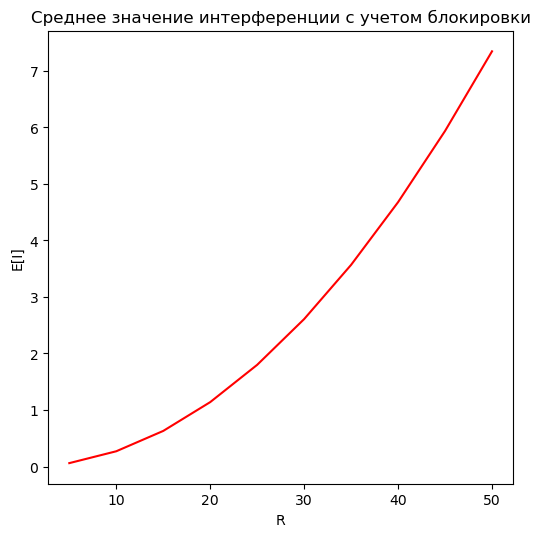

In [25]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Среднее значение интерференции с учетом блокировки')

plt.plot(R, diagram1_means,'r-')
plt.xlabel('R')
plt.ylabel('E[I]')
plt.show()

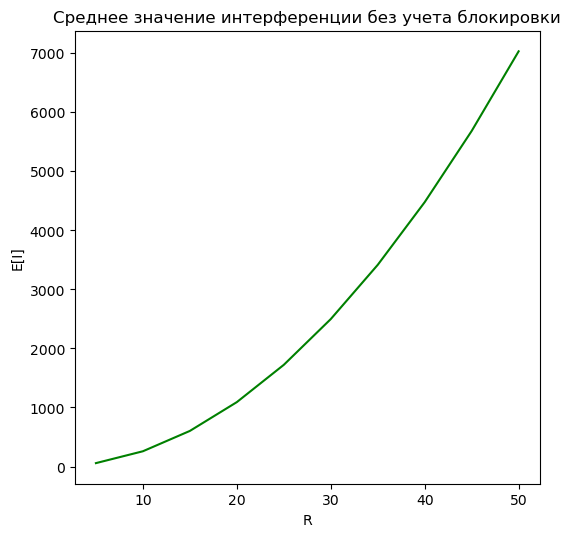

In [26]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Среднее значение интерференции без учета блокировки')

plt.plot(R, diagram2_means,'g-')
plt.xlabel('R')
plt.ylabel('E[I]')
plt.show()

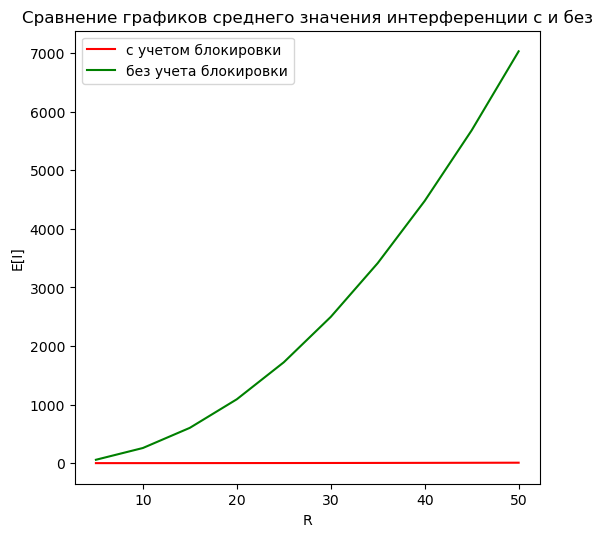

In [27]:
plt.figure(dpi=100,figsize=(6,6))
plt.title('Сравнение графиков среднего значения интерференции с и без')

plt.plot(R, diagram1_means,'r-')
plt.plot(R, diagram2_means,'g-')

plt.legend(('с учетом блокировки','без учета блокировки'))
plt.xlabel('R')
plt.ylabel('E[I]')
plt.show()